# **Heart Attack analysis** 

In this notebook we explore a dataset about heart attacks and look at factors with regard to their occurences. 
Our main focus lies on the questions whether 
- There is no significant difference between the different factors of a heart attack depending on the gender 
- The chance of having a heart attack correlates with the type of chest pain
- CAA has a direct influence on the resting blood pressure, maximal heart rate and exercise induced angina
- There are more or less relevant factors that may predict a heart attack

The dataset was downloaded here:
https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset





# Importing Data and Modules

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
import io

df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
# Dataset is now stored in a Pandas Dataframe

# Explorig data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().values.any()
#No Nan Values

False

In [6]:
df.rename(columns={'cp':'chest_pain','trtbps': 'resting_BP','chol':'cholesterol', 'fbs':'fasting_BS', 'restecg':'resting_ECG', 'thalachh': 'max_heart_rate', 'slp': 'ST_slope', 'output':'HA_pred' },inplace=True)

In [7]:
#0 Age 
#1 Sex 
#2 Chest pain 1-4
#3 resting_bp
#4 cholesterol
#5 fasting_bs 
#6 resting_ecg_result  
#7 max_heart_rate
#8 exang 
#9 oldpeak (bit tricky)
#10 st_slope 
#11 caa // include description somewhere corona artery anomalities
#12 thal // thalassemia
#13 HA_pred // Heart attack prediction

df.columns

Index(['age', 'sex', 'chest_pain', 'resting_BP', 'cholesterol', 'fasting_BS',
       'resting_ECG', 'max_heart_rate', 'exng', 'oldpeak', 'ST_slope', 'caa',
       'thall', 'HA_pred'],
      dtype='object')

# *Explain variable values*

#      Variables

 age 
 * age of patient

---

 sex

*    conditions:

 * 0: female

 * 1: male
 
---
 chest_pain (chest pain type)

*  conditions:

 * 0: typical angina 

 *  1: atypical angina

 * 2: non-anginal pain

 * 3: asymptomatic



---

 resting_BP (resting blood pressure)			
*    in mm Hg 
*   measured on admission to hospital
*    normally: 120/80
  

---

 cholesterol 
*    mg/dl
*    200-239 is considered borderline high
*    value >240 is too high

---

 fasting_BS (fasting blood sugar)
*    120 mg/dl
*    conditions:
	*  1: > 120 mg/dl
	*  0: <= 120 mg/dl
*    normal: ~100

---

 resting_ECG (resting electrocardiographic results)
*    conditions:
	*  0: normal
	*  1: ST-T 
	*  2: hypertrophy 

---

 max_heart_rate (maximum heart rate achieved)
*    normal: 72

---

 exng (exercise induced angina)
*    conditions:
	*  1: true
	*  0: false

---

 oldpeak:
*    ST depression induced by exercise relative to rest
---

 ST_slope:
*    slope of peak exercise ST segment
ST_slope:
*    slope of peak exercise ST segment
*    conditions:
	*  0: upsloping
	*  1: flat
	*  2: downsloping

---

 caa (number of major vessels (index or nr?)):
*    range:
	*    0 - 4

---

 thall (thallamaesia)
*    conditions:
	*  1: normal
	*  2: fixed defect
	*  3: reversable defect
---

 HA_pred (chance of heart attack)
*    conditions:
	*  0: less chance of heart attack
	*  1: more chance of heart attack


# *Do some stat methods here*

In [8]:
# Calc mean, sd, median for age, resting_BP, fasting_BS, max_HR

In [9]:
#Calculate the number of female and male subjects

# TO suppress warnings use this:
import warnings
warnings.filterwarnings('ignore')

#Calculate the mean of the cholesteral grouped by sex 
df_1 = df.groupby('sex', as_index=False)['cholesterol','age', 'resting_BP','max_heart_rate'].mean().round(2)
#Calculate the median of the cholesteral grouped by sex 
df_2 = df.groupby('sex', as_index=False)['cholesterol','age', 'resting_BP','max_heart_rate'].median().round(2)

# Tidy format 
df_2.rename(index={0:'Male',1:'Female'},inplace=True)
df_1.rename(index={0:'Male',1:'Female'},inplace=True)

display(df_1)
display(df_2)
;

,sex,cholesterol,age,resting_BP,max_heart_rate
Male,0,261.30,55.68,133.08,151.12
Female,1,239.29,53.76,130.95,148.96


,sex,cholesterol,age,resting_BP,max_heart_rate
Male,0,253,57,131,157
Female,1,235,54,130,151


''

# *Data visualization*

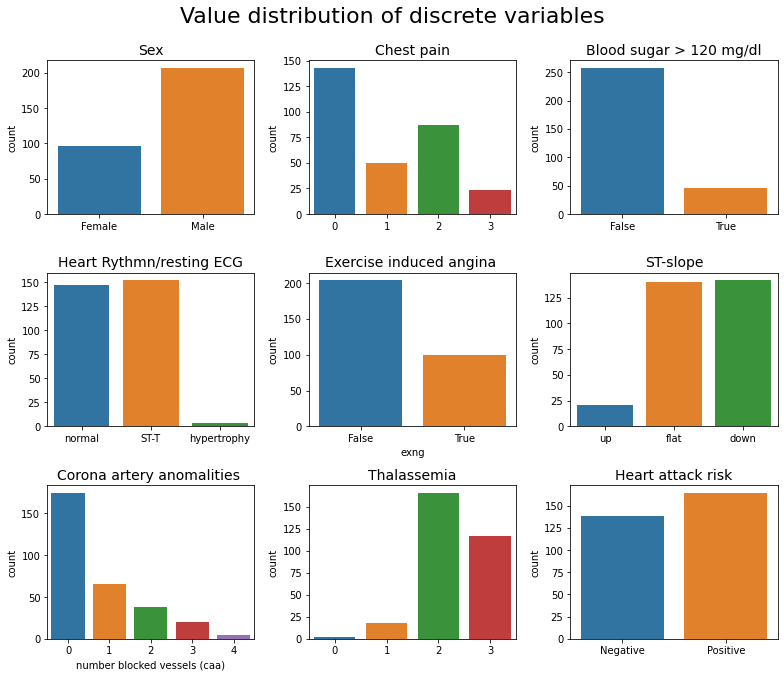

In [10]:
import matplotlib.pyplot as plt

# Vars: sex, chest_pain, fasting_BS, resting_ECG, exng, ST_slope, caa, thall,HA_pred 

fig, plot = plt.subplots(3,3, figsize = (11,9))

fig.suptitle('Value distribution of discrete variables', fontsize = 22, y = 1.04)


plot[0,0] = sns.countplot(data = df,
                        x = 'sex',
                        ax = plot[0,0])
plot[0,0].set_title('Sex',fontsize = 14)
plot[0,0].set_xticklabels(['Female','Male'])
plot[0,0].set_xlabel('')

plot[0,1] = sns.countplot(data = df,
                      x = 'chest_pain',
                      ax = plot[0,1])
# (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
#plot[0,1].set_xticklabels(['angina','atypical angina','non_anginal','asymptomatic'])
plot[0,1].set_title('Chest pain',fontsize = 14)
plot[0,1].set_xlabel('')

plot[0,2] = sns.countplot(data = df,
                        x = 'fasting_BS',
                        ax = plot[0,2])
plot[0,2].set_title('Blood sugar > 120 mg/dl',fontsize = 14)
plot[0,2].set_xticklabels(['False','True'])
plot[0,2].set_xlabel('')

plot[1,0] = sns.countplot(data = df,
                       x = 'resting_ECG',
                       ax = plot[1,0])
plot[1,0].set_title('Heart Rythmn/resting ECG',fontsize = 14)
#0 = normal; 1 = having ST-T; 2 = hypertrophy
plot[1,0].set_xticklabels(['normal','ST-T','hypertrophy'])
plot[1,0].set_xlabel('')


plot[1,1] = sns.countplot(data = df,
                       x = 'exng',
                       ax = plot[1,1])
plot[1,1].set_title('Exercise induced angina ',fontsize = 14)
plot[1,1].set_xticklabels(['False','True'])

plot[1,2] = sns.countplot(data = df,
                       x = 'ST_slope',
                       ax = plot[1,2])
plot[1,2].set_title('ST-slope',fontsize = 14)
plot[1,2].set_xticklabels(['up','flat','down'])
plot[1,2].set_xlabel('')

plot[2,0] = sns.countplot(data = df,
                      x = 'caa',
                      ax = plot[2,0],
                      )
plot[2,0].set_xlabel('number blocked vessels (caa)')
plot[2,0].set_title('Corona artery anomalities ',fontsize = 14)

plot[2,1] = sns.countplot(data = df,
                       x = 'thall',
                       ax = plot[2,1])
plot[2,1].set_title('Thalassemia',fontsize = 14)
plot[2,1].set_xlabel('') # Missing description

plot[2,2] = sns.countplot(data = df,
                          x = 'HA_pred',
                          ax = plot[2,2])
plot[2,2].set_title('Heart attack risk',fontsize = 14);
plot[2,2].set_xticklabels(['Negative','Positive'])
plot[2,2].set_xlabel('')


fig.tight_layout()

# Include some comments 

Text(0.5, 51.0, '')

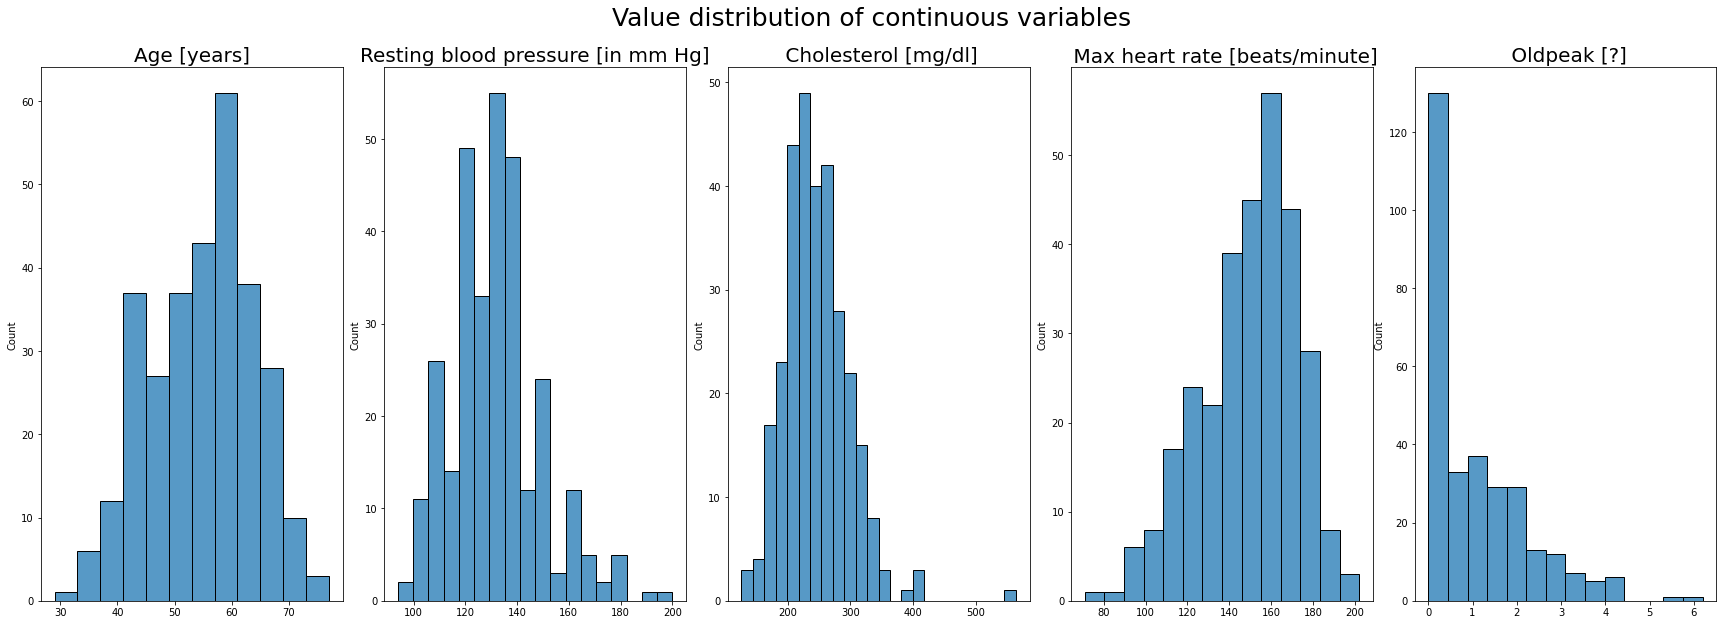

In [11]:
import matplotlib.pyplot as plt

fig, plot = plt.subplots(1,5, figsize = (24,8))

fig.suptitle('Value distribution of continuous variables',fontsize = 25,y=1.08)
fig.tight_layout()

plot[0] = sns.histplot(data = df,
                        x = 'age',
                        ax = plot[0],
                        bins = 'auto',
                       )
plot[0].set_title('Age [years]',fontsize = 20)

plot[1] = sns.histplot(data = df,
                       x = 'resting_BP',
                       bins = 'auto',
                       ax = plot[1])
plot[1].set_title('Resting blood pressure [in mm Hg]',fontsize = 20)

plot[2] = sns.histplot(data = df,
                      x = 'cholesterol',
                      ax = plot[2],
                      bins = 'auto'
                      )
plot[2].set_title(' Cholesterol [mg/dl]',fontsize = 20)

plot[3] = sns.histplot(data=df,
                       x = 'max_heart_rate',
                       bins = 'auto',
                       kde = False,
                       ax = plot[3])
plot[3].set_title(' Max heart rate [beats/minute]',fontsize = 20)

plot[4] = sns.histplot(data = df,
                       x = 'oldpeak',
                       bins = 'auto',
                       ax = plot[4],
                       kde = False,
                       )
plot[4].set_title(' Oldpeak [?]',fontsize = 20)
plot[0].set_xlabel('')
plot[1].set_xlabel('')
plot[2].set_xlabel('')
plot[3].set_xlabel('')
plot[4].set_xlabel('')


Here is yet another visulization of the varibale *age* 

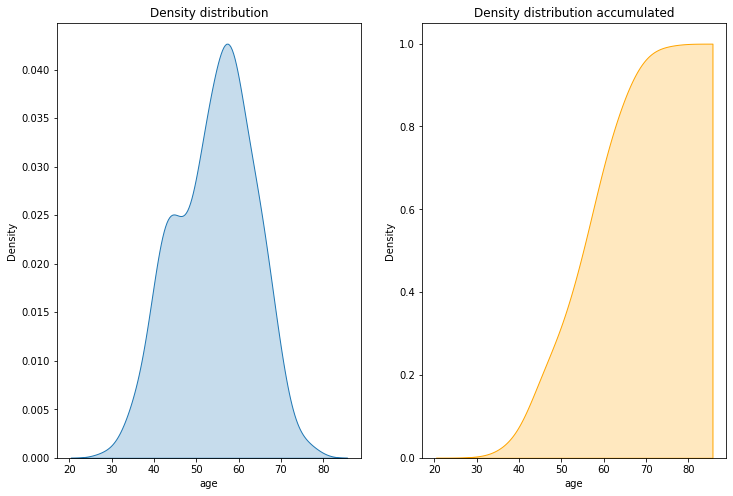

In [12]:
 fig, plot = plt.subplots(1,2,figsize=(12,8))
 
 sns.kdeplot(data=df,x='age',shade=True,shade_lowest=True,cumulative=False,ax=plot[0])
 sns.kdeplot(data=df,x='age',shade=True,shade_lowest=True,cumulative=True,color='orange',ax=plot[1])

 plot[0].set(title='Density distribution')
 plot[1].set(title='Density distribution accumulated')
 
 warnings.warn('ignore')
 

# Data Cleaning

In [13]:
# Make outlier detection and deletion
from scipy import stats
import numpy as np

df_cleaned = df[(np.abs(stats.zscore(df['cholesterol'])) < 3)]
df_cleaned = df_cleaned[(np.abs(stats.zscore(df_cleaned['max_heart_rate'])) < 3)] 
df_cleaned = df_cleaned[(np.abs(stats.zscore(df_cleaned['oldpeak'])) < 3)]
df_cleaned = df_cleaned[(np.abs(stats.zscore(df_cleaned['resting_BP'])) < 3)]
 

''

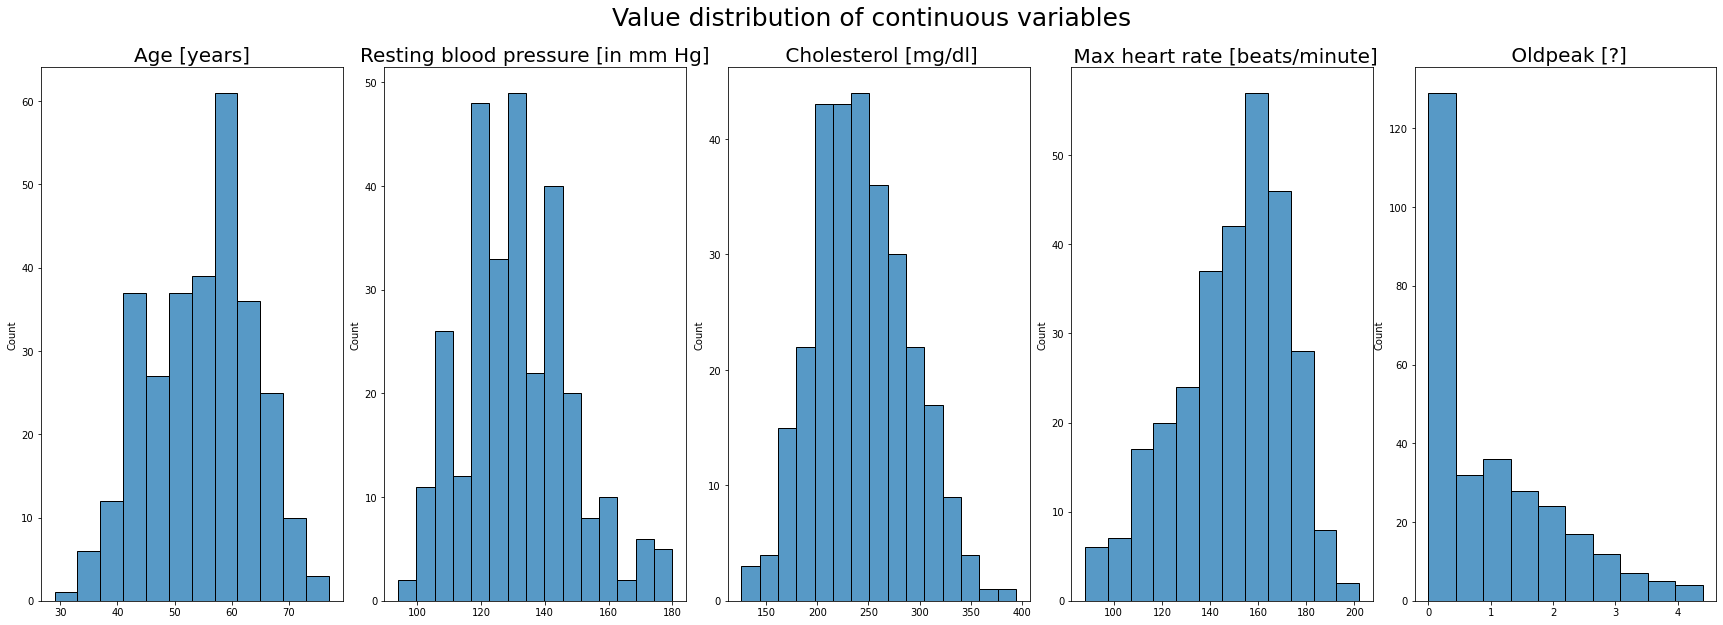

In [14]:
# Verify zscore; Delete ? Yes.
fig, plot = plt.subplots(1,5, figsize = (24,8))

fig.suptitle('Value distribution of continuous variables',fontsize = 25,y=1.08)
fig.tight_layout()

plot[0] = sns.histplot(data = df_cleaned,
                        x = 'age',
                        ax = plot[0],
                        bins = 'auto',
                       )
plot[0].set_title('Age [years]',fontsize = 20)

plot[1] = sns.histplot(data = df_cleaned,
                       x = 'resting_BP',
                       bins = 'auto',
                       ax = plot[1])
plot[1].set_title('Resting blood pressure [in mm Hg]',fontsize = 20)

plot[2] = sns.histplot(data = df_cleaned,
                      x = 'cholesterol',
                      ax = plot[2],
                      bins = 'auto'
                      )
plot[2].set_title(' Cholesterol [mg/dl]',fontsize = 20)

plot[3] = sns.histplot(data=df_cleaned,
                       x = 'max_heart_rate',
                       bins = 'auto',
                       kde = False,
                       ax = plot[3])
plot[3].set_title(' Max heart rate [beats/minute]',fontsize = 20)

plot[4] = sns.histplot(data = df_cleaned,
                       x = 'oldpeak',
                       bins = 'auto',
                       ax = plot[4],
                       kde = False,
                       )
plot[4].set_title(' Oldpeak [?]',fontsize = 20)
plot[0].set_xlabel('')
plot[1].set_xlabel('')
plot[2].set_xlabel('')
plot[3].set_xlabel('')
plot[4].set_xlabel('')
;

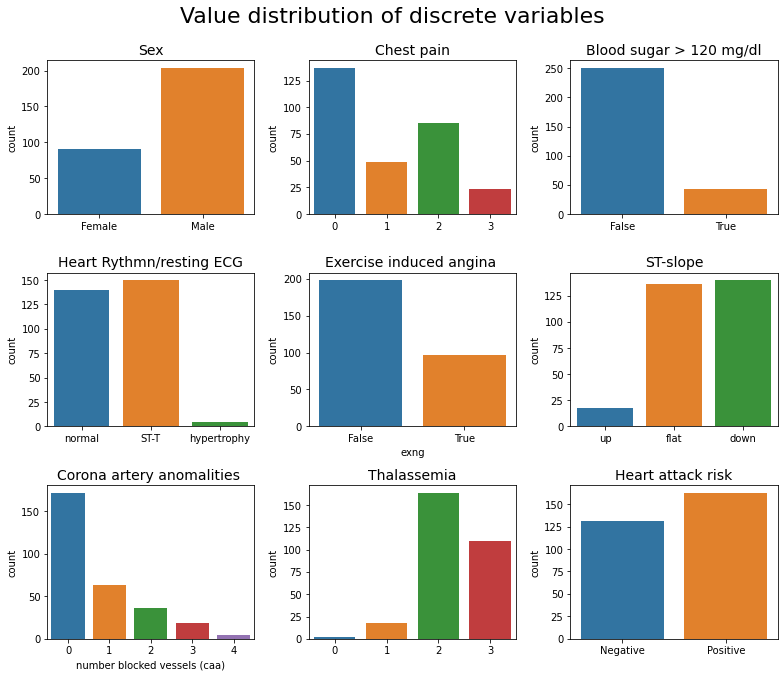

In [15]:
import matplotlib.pyplot as plt

#Delete at the end.

# Vars: sex, chest_pain, fasting_BS, resting_ECG, exng, ST_slope, caa, thall,HA_pred 

fig, plot = plt.subplots(3,3, figsize = (11,9))

fig.suptitle('Value distribution of discrete variables', fontsize = 22, y = 1.04)


plot[0,0] = sns.countplot(data = df_cleaned,
                        x = 'sex',
                        ax = plot[0,0])
plot[0,0].set_title('Sex',fontsize = 14)
plot[0,0].set_xticklabels(['Female','Male'])
plot[0,0].set_xlabel('')

plot[0,1] = sns.countplot(data = df_cleaned,
                      x = 'chest_pain',
                      ax = plot[0,1])
# (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
#plot[0,1].set_xticklabels(['angina','atypical angina','non_anginal','asymptomatic'])
plot[0,1].set_title('Chest pain',fontsize = 14)
plot[0,1].set_xlabel('')

plot[0,2] = sns.countplot(data = df_cleaned,
                        x = 'fasting_BS',
                        ax = plot[0,2])
plot[0,2].set_title('Blood sugar > 120 mg/dl',fontsize = 14)
plot[0,2].set_xticklabels(['False','True'])
plot[0,2].set_xlabel('')

plot[1,0] = sns.countplot(data = df_cleaned,
                       x = 'resting_ECG',
                       ax = plot[1,0])
plot[1,0].set_title('Heart Rythmn/resting ECG',fontsize = 14)
#0 = normal; 1 = having ST-T; 2 = hypertrophy
plot[1,0].set_xticklabels(['normal','ST-T','hypertrophy'])
plot[1,0].set_xlabel('')


plot[1,1] = sns.countplot(data = df_cleaned,
                       x = 'exng',
                       ax = plot[1,1])
plot[1,1].set_title('Exercise induced angina ',fontsize = 14)
plot[1,1].set_xticklabels(['False','True'])

plot[1,2] = sns.countplot(data = df_cleaned,
                       x = 'ST_slope',
                       ax = plot[1,2])
plot[1,2].set_title('ST-slope',fontsize = 14)
plot[1,2].set_xticklabels(['up','flat','down'])
plot[1,2].set_xlabel('')

plot[2,0] = sns.countplot(data = df_cleaned,
                      x = 'caa',
                      ax = plot[2,0],
                      )
plot[2,0].set_xlabel('number blocked vessels (caa)')
plot[2,0].set_title('Corona artery anomalities ',fontsize = 14)

plot[2,1] = sns.countplot(data = df_cleaned,
                       x = 'thall',
                       ax = plot[2,1])
plot[2,1].set_title('Thalassemia',fontsize = 14)
plot[2,1].set_xlabel('') # Missing description

plot[2,2] = sns.countplot(data = df_cleaned,
                          x = 'HA_pred',
                          ax = plot[2,2])
plot[2,2].set_title('Heart attack risk',fontsize = 14);
plot[2,2].set_xticklabels(['Negative','Positive'])
plot[2,2].set_xlabel('')


fig.tight_layout()

# Include some comments 

# Hypothesis testing

Examine the distribution among *age* of the various types of *resting_ECG* data (electroenzephalogram)

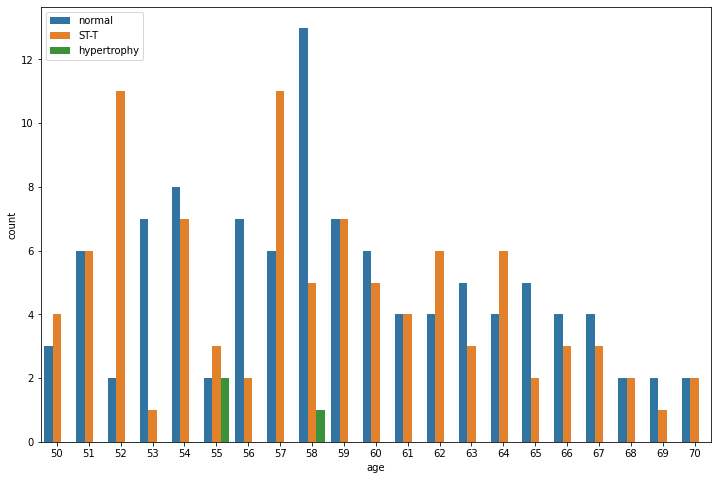

In [16]:
df_filtered = df_cleaned.query('age >= 50 and age <= 70')

fig, plot = plt.subplots(figsize=(12,8))

plot = sns.countplot(data=df_filtered,
              x='age',
              hue='resting_ECG',
              dodge=True,
              )
plot.legend(labels =['normal', 'ST-T','hypertrophy']);


### Copy below here###

''

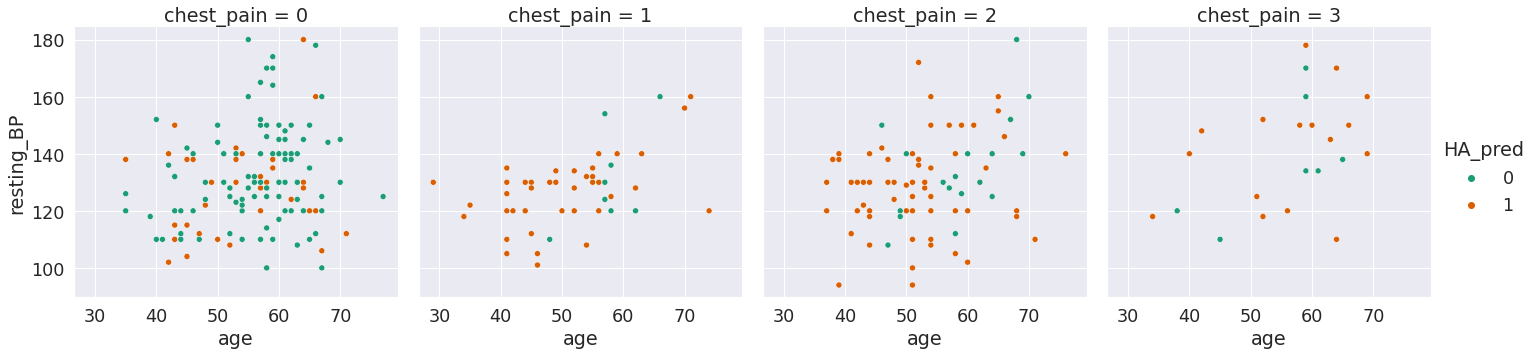

In [28]:
sns.set_theme(palette='Dark2',font_scale=1.6) # Dark2_r

sns.relplot(data = df_cleaned,
            col = 'chest_pain',
            hue = 'HA_pred',
            #style = 'HA_pred',
            x = 'age',
            y = 'resting_BP',
            #size = 'sex'
            ) 
;

In [29]:
# Split Df into groups by feature value

def split(df_cleaned, group):
     gb = df_cleaned.groupby(group)
     return [gb.get_group(x) for x in gb.groups]

splittable = split(df_cleaned,'chest_pain')

In [20]:
import numpy as np

# Count feature occurence of condition/value
def count_counts(df, condition):
  return df.query(condition).shape[0]

neg = []
pos = []
for s in splittable:
  neg.append((count_counts(s, condition='HA_pred == 0')))
  pos.append((count_counts(s, condition='HA_pred == 1')))

frame = pd.DataFrame(data=(neg,pos)).transpose()
frame[2] = frame[0] + frame[1]
frame.rename(axis=1,mapper={0:'neg',1:'pos',2:'total'},inplace=True)
frame.rename(index={0:'cp-1',1:'cp-2',2:'cp-3',3:'cp-4'},inplace=True)
frame['%'] = round(frame['pos']/frame['total'],2)
frame

,neg,pos,total,%
cp-1,98,39,137,0.28
cp-2,8,41,49,0.84
cp-3,18,67,85,0.79
cp-4,7,16,23,0.70


In [21]:
# Get conditional probability on column chest_pain

# Start by calculation P(chest_pain)
# Sample size 303
joint_prob_pos = frame['pos']/303
joint_prob_neg = 1-joint_prob_pos
start_prob = [round(x/303,2) for x in frame['total']]

# Make table with cond. probs for chest_pain types
results = []
for index, value in enumerate(start_prob):
  #print('Probability of an heart attack given the types of chest pain: chest pain type {:} prob = {:}'.format(index,round(joint_prob_pos[index]/value,3)))
  results.append(round(joint_prob_pos[index]/value,2))

# Put into table form 
data = pd.DataFrame(data=(results,start_prob,joint_prob_pos,joint_prob_neg)).T
data.rename(inplace=True,columns={0:'P(H|CP)',1:'P(CP)',2:'P(H,CP)',3:'P(-H,CP)'},index={0:'type-1',1:'type-2',2:'type-3',3:'type-4'})

data

,P(H|CP),P(CP),"P(H,CP)","P(-H,CP)"
type-1,0.29,0.45,0.128713,0.871287
type-2,0.85,0.16,0.135314,0.864686
type-3,0.79,0.28,0.221122,0.778878
type-4,0.66,0.08,0.052805,0.947195


**Observation**:

The conditonal probability table tells us the likelihood of getting a heart attack given a type of chest pain.
A short reminder types of chest pain: 

    0: typical angina
    1: atypical angina
    2: non-anginal pain
    3: asymptomatic

Thus, a typical anginal pain:0 shows the lowest cond.probability while having the highest marginal probability. The highest cond. prob. of suffering a heart attack goes along with type 2, then 3, then 4.

###cut here###

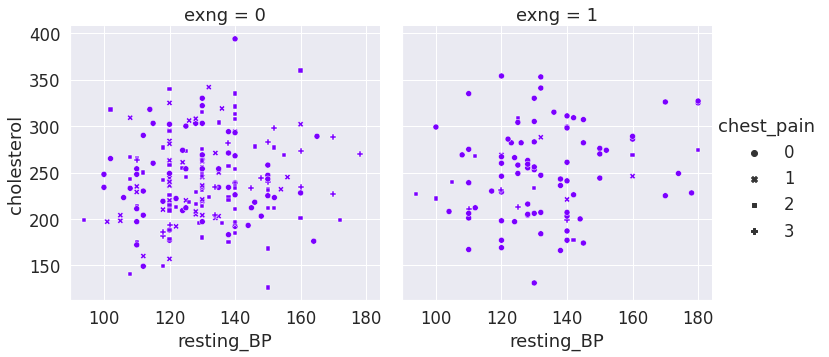

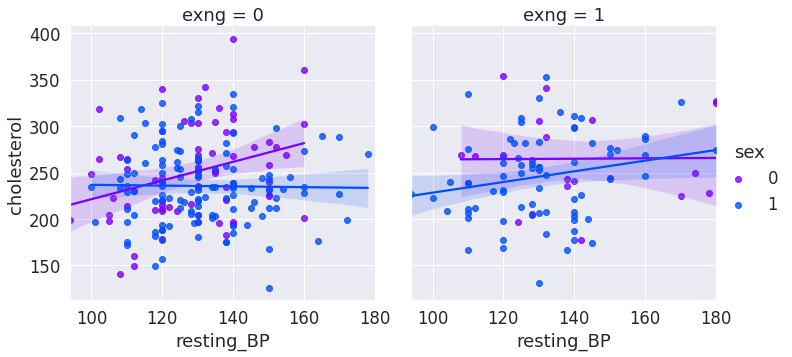

In [ ]:
sns.set_theme(font_scale=1.5,palette= 'gist_rainbow_r')

sns.relplot(data = df_cleaned, 
            x ='resting_BP',
            y = 'cholesterol', 
            col= 'exng',
            #hue= 'chest_pain',
            style='chest_pain')

sns.lmplot(data= df_cleaned,
           x = 'resting_BP',
           y = 'cholesterol',
           col = 'exng',
           hue = 'sex',
           );

In [22]:
splittable = split(df_cleaned, 'exng')
groups= []
for group in splittable:
  groups.append(count_counts(group,'chest_pain == 0'))
  groups.append(count_counts(group,'chest_pain == 1'))
  groups.append(count_counts(group,'chest_pain == 2'))
  groups.append(count_counts(group,'chest_pain == 3'))


groups.insert(4,sum([groups[0],groups[1],groups[2],groups[3]]))
groups.insert(9,sum([groups[5],groups[6],groups[7],groups[8]]))
groups

# Create DataFrame 
frame = pd.DataFrame(data=(groups[0:5],groups[5::]))
frame.rename(axis=1, mapper = {0:'cp1',1:'cp2',2:'cp3',3:'cp4',4:'total'},inplace=True)
frame

,cp1,cp2,cp3,cp4,total
0,60,45,74,19,198
1,77,4,11,4,96


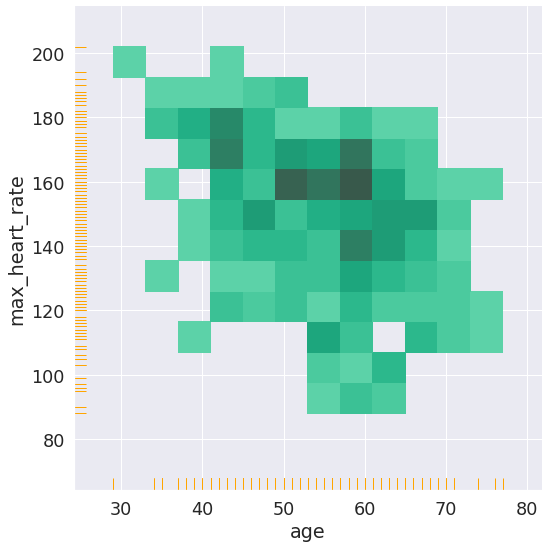

In [23]:
sns.displot(data = df_cleaned, 
            x = 'age',
            y = 'max_heart_rate',
            bins = 'auto',
            rug = True,
            rug_kws = {'color':'orange'},
            height = 8,
            kind = 'hist' # kde, ecdf, default:hist
            );

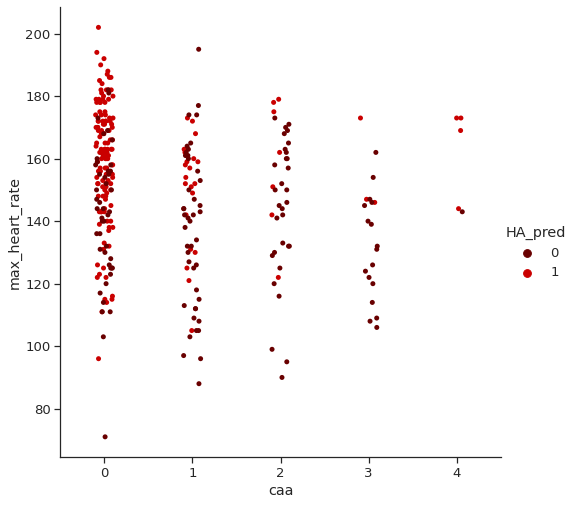

In [ ]:
sns.set_theme(palette='hot', font_scale = 1.2,font = 'sans')

sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})

sns.catplot(data =df_cleaned,
            x = 'caa',
            y = 'max_heart_rate',
            hue = 'HA_pred',
            height = 7);

In [ ]:
df_split = split(df,'caa')
caa_data = []
for i,v in enumerate(df_split):
  caa_data.append(count_counts(df_split[i],'HA_pred == 0'))
  caa_data.append(count_counts(df_split[i],'HA_pred == 1'))

HA_neg = caa_data[0::2]
HA_pos = caa_data[1::2]
HA_neg.append(sum(HA_neg))
HA_pos.append(sum(HA_pos))
frame = pd.DataFrame(data=(HA_neg,HA_pos))
frame.rename(axis=1,inplace=True,mapper={0:'type0',1:'type1',2:'type2',3:'type3',4:'type4',5:'total'})
frame.rename(axis=0,inplace=True,mapper={0:'ha_neg',1:'ha_pos'})
frame

,type0,type1,type2,type3,type4,total
ha_neg,45,44,31,17,1,138
ha_pos,130,21,7,3,4,165


In [ ]:
HA_neg_new = [round(x/303,3) for x in HA_neg]
HA_pos_new = [round(x/303,3) for x in HA_pos]
frame = pd.DataFrame(data=(HA_neg_new,HA_pos_new))
frame.rename(axis=1,inplace=True,mapper={0:'type0',1:'type1',2:'type2',3:'type3',4:'type4',5:'total'})
frame.rename(axis=0,inplace=True,mapper={0:'ha_neg',1:'ha_pos'})
frame['total']=[138,165]
frame

,type0,type1,type2,type3,type4,total
ha_neg,0.149,0.145,0.102,0.056,0.003,138
ha_pos,0.429,0.069,0.023,0.010,0.013,165


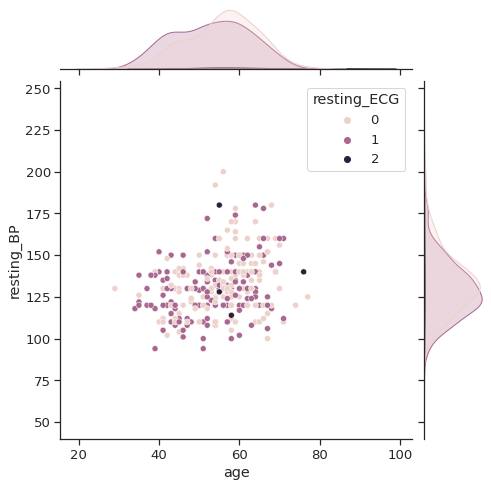

In [ ]:
sns.set_theme(font_scale = 1.2,font = 's')

sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})

sns.jointplot(data=df,
              x = 'age',
              y = 'resting_BP',
              height = 7,
              hue = 'resting_ECG',
              )

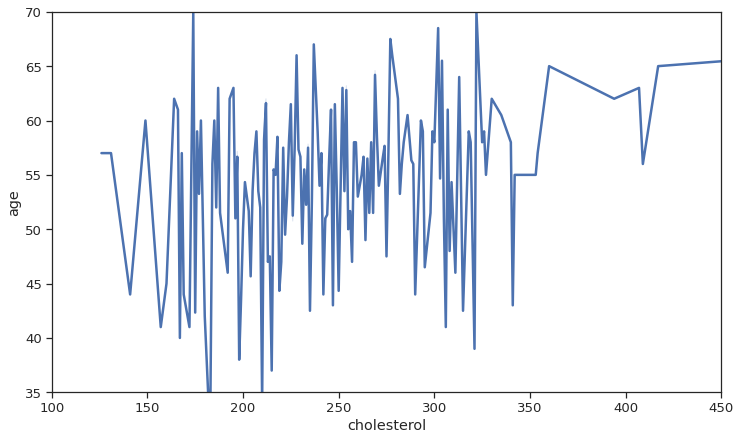

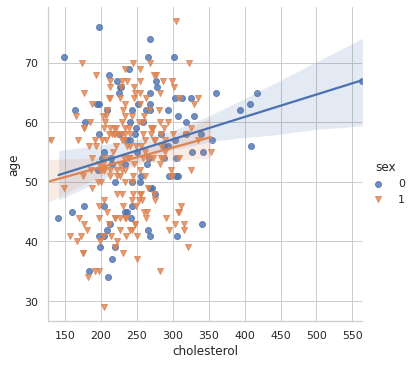

In [ ]:
fix,plot = plt.subplots(figsize=(12,7))


sns.lineplot(data=df,
             x = 'cholesterol',
             y = 'age',
             palette = 'tab10',
             linewidth = 2.5,
             ax = plot,
             ci = 5,
             )

sns.set_theme(style='whitegrid')


plot.axis([100,450,35,70])



plot = sns.lmplot(data=df,
             x = 'cholesterol',
             y = 'age',
             #palette = 'tab12',
             hue = 'sex',
             markers = ['o','v'],
             #scatter = False
           )


In [ ]:
sns.pairplot(data=df,
             hue='sex')

# Discussion

Research hypothesis question in respect to something plotted

###**Chest pain & heart attack correlation**

Let's explore the relevance of the types of chest pain in respective to their heart attack causation.
Observe different ways of analysis.

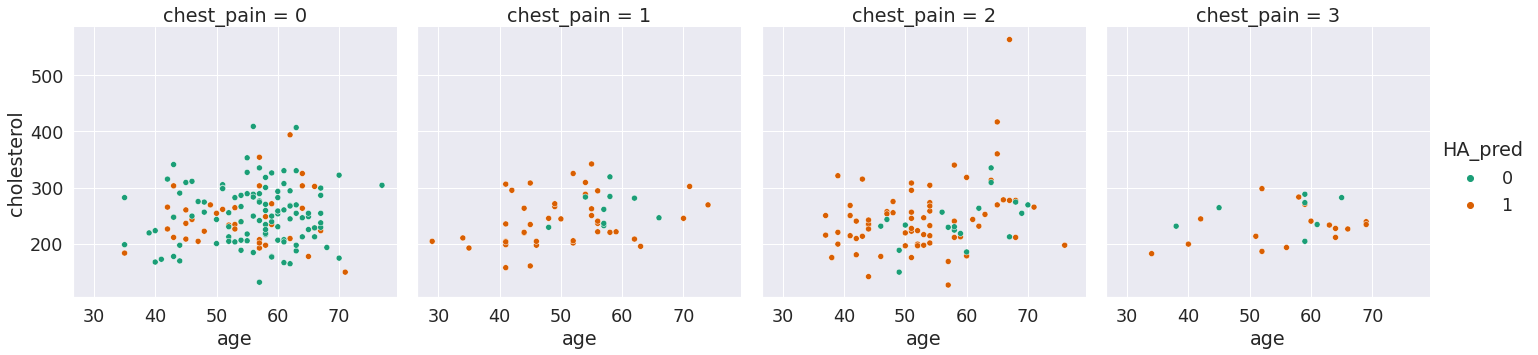

In [ ]:
# To visualize this .. 

sns.set_theme(palette='Dark2',font_scale=1.6)

sns.relplot(data = df,
            col = 'chest_pain',
            hue = 'HA_pred',
            #style = 'HA_pred',
            y = 'cholesterol',
            x = 'age',
            
            ) ;

######**Observation:**

We see a clear dominance for non-threatening chest pain in plot 1 ~ chest pain type 1.
The difference among the subplots consists quantitatively in the number of data points and their colour.
Thus, it looks like there is low evidence to say that cholesterol plays a big role regarding the HA_pred. 
However the type of chest pain is greater of a criterium.


In [ ]:
# One more plot, but something big

# Try linear regression here
from sklearn.linear_model import LinearRegression
import itertools

In [ ]:
df.tail()

,age,sex,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_heart_rate,exng,oldpeak,ST_slope,caa,thall,HA_pred
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Run a regression model - search for factor cominations with highest fit**

In [ ]:
# Use independent variables age, sex, chest_pain, cholesterol, resting_BP, max_heart_rate, resting_ECG,caa; exclude thall, ST-slope, oldepeak, exng
# Model lr
#model = LinearRegression(n_jobs = -1).fit(df_numpy_X,df_numpy_Y)

# Vars of interest
variables = ['age','sex','chest_pain','resting_BP','resting_ECG','max_heart_rate','caa','cholesterol','fasting_BS']

# def function for automized lr
def auto_lr(names:list):
  # Shape and feed input
  df_numpy_X = df[[*names]].to_numpy()
  df_numpy_Y = df['HA_pred'].to_numpy()
  model = LinearRegression(n_jobs = -1).fit(df_numpy_X,df_numpy_Y)
  # coefficient of determination R^2
  R_SQ = model.score(df_numpy_X, df_numpy_Y)
  #print(f'Coefficient of determination: {R_SQ}')
  print(f'intercept: {model.intercept_}')
  print(f'slope: {model.coef_}')
  print(f'model-params: {[*names]}')
  return R_SQ, model
  
auto_lr(['age','chest_pain'])


intercept: 0.9351225329426647
slope: [-0.01079737  0.2031499 ]
model-params: ['age', 'chest_pain']


(0.22664394001254928,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False))

In [ ]:
# Func to maximize auto_lr

# Vars of interest
variables = ['age','sex','chest_pain','resting_BP','resting_ECG','max_heart_rate','caa','cholesterol','fasting_BS']

def max_auto_lr(variables):
  # For plotting keep track of R-val, number of steps
  R_Values = []
  R_Step = []
  i = 0
  search_len = len(variables)
  #Start with base combination of all vars
  iterated = itertools.combinations(variables,search_len)

  for comb in iterated: 
    R_SQ ,model = auto_lr(comb)
  
  Final_comb = comb
  Model_Coef = model.coef_
  R_Values.append(R_SQ)
  R_Step.append(i)
  i +=1

  # As long as there is a combination of variables with at least one var
  while True:


    search_len -= 1
    if search_len == 0:
      # Else break here;
      break
    # Get other combs
    iterated = itertools.combinations(variables, search_len)
    for comb in iterated:
      R_SQ_2, model = auto_lr(comb)
      R_Values.append(R_SQ_2)
      R_Step.append(i)
      i += 1 

      if R_SQ_2 > R_SQ:
        R_SQ = R_SQ_2
        Final_comb = comb
        Model_Coef = model.coef_
  
  return R_SQ, Final_comb, Model_Coef, R_Values, R_Step
    
VAL, COMB, COEF, R_Values, R_Step = max_auto_lr(variables)

# Show any of them:  
#VAL
#COMB
#COEF
#R_Step
#R_Values

''

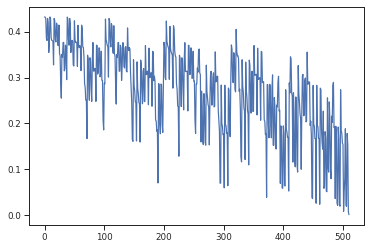

In [ ]:
# Plot progress of R^2 over time 
# We see decrease as params are getting lesser
sns.lineplot(x=R_Step,y=R_Values,dashes=False)
sns.set_context("paper")
;

In [ ]:
# Display best solution: 

print(f'Linear regression model:')
print(f'R^2-value: {VAL}')
print(f'Variables: {COMB}')
print(f'Coefficient: {COEF}')

Linear regression model:
R^2-value: 0.4322661279499087
Variables: ('age', 'sex', 'chest_pain', 'resting_BP', 'resting_ECG', 'max_heart_rate', 'caa', 'cholesterol', 'fasting_BS')
Coefficient: [-0.00041457 -0.26295465  0.14421939 -0.00351511  0.05491344  0.00569289
 -0.11311381 -0.00064115  0.02476755]
